<a href="https://colab.research.google.com/github/bilik49/statistical_analysis/blob/main/anova_nonparam_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [39]:
df = pd.read_csv('/content/drive/MyDrive/data/statistic/data_big.csv')

In [40]:
df.head()

,Unnamed: 0,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
0,1,1,1,1,0,1,1,1,1,0,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
1,2,2,1,1,0,0,1,1,2,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
2,3,3,1,1,0,0,0,2,1,0,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
3,4,4,2,2,0,0,0,2,0,0,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
4,5,5,1,1,0,0,2,2,1,0,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0


In [41]:
df.columns = [col.replace('.','_') for col in df.columns]
df.columns

Index(['Unnamed: 0', 'X_1', 'depressed_mood_1', 'anxiety_1',
       'suspiciousness_1', 'irritability_1', 'craving_to_alcohol_1',
       'weakness_1', 'insomia_1', 'headache_1',
       ...
       'combined2_9', 'HR_9', 'SBP_9', 'DBP_9', 'MBP_9', 'SV_9', 'CO_9',
       'SI_9', 'CI_9', 'TPR_9'],
      dtype='object', length=121)

Численные признаки:

In [42]:
df.columns[df.nunique() > 5]

Index(['Unnamed: 0', 'X_1', 'combined1_1', 'combined2_1', 'HR_1', 'SBP_1',
       'DBP_1', 'MBP_1', 'SV_1', 'CO_1', 'SI_1', 'CI_1', 'TPR_1', 'X_2',
       'combined1_2', 'combined2_2', 'HR_2', 'SBP_2', 'MBP_2', 'DBP_2', 'SV_2',
       'CO_2', 'SI_2', 'CI_2', 'TPR_2', 'X_3', 'combined1_3', 'combined2_3',
       'HR_3', 'SBP_3', 'DBP_3', 'MBP_3', 'SV_3', 'CO_3', 'SI_3', 'CI_3',
       'TPR_3', 'X_9', 'HR_9', 'SBP_9', 'DBP_9', 'MBP_9', 'SV_9', 'CO_9',
       'SI_9', 'CI_9', 'TPR_9'],
      dtype='object')

Категориальные признаки:

In [43]:
df.columns[(df.nunique() > 2) & (df.nunique() < 5)]

Index(['anxiety_1', 'irritability_1', 'craving_to_alcohol_1', 'weakness_1',
       'insomia_1', 'headache_1', 'tremor_1', 'sweating_1',
       'transient_hallusinations_1', 'vomiting_1', 'anoreksia_1', 'thirst_1',
       'chest_pain_1', 'hyperemia_1', 'depressed_mood_2',
       'craving_to_alcohol_2', 'weakness_2', 'insomia_2', 'headache_2',
       'tremor_2', 'sweating_2', 'anoreksia_2', 'thirst_2', 'weakness_3',
       'insomia_3', 'tremor_3', 'sweating_3', 'thirst_3', 'combined1_9',
       'combined2_9'],
      dtype='object')

# Непараметрические критерии

### 1. Однофакторный дисперсионный анализ (ANOVA)

Проверим однородность признака combined2 в зависимости от уровня тревожности в 1 день.

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('combined2_1 ~ C(anxiety_1)', data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(anxiety_1),2.0,31.151176,15.575588,5.377472,0.009889
Residual,31.0,89.790000,2.896452,NaN,NaN


Через пакет scipy:

In [45]:
st.f_oneway(df['combined2_1'][df['anxiety_1'] == 0],
               df['combined2_1'][df['anxiety_1'] == 1],
               df['combined2_1'][df['anxiety_1'] == 2])

F_onewayResult(statistic=5.3774722719024135, pvalue=0.009888573149631517)

### 1'. Попарные сравнения. 

В сравнении пар используем поправки Бонферони.

In [46]:
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(df['combined2_1'], df['anxiety_1'])
tbl, a1, a2 = comp1.allpairtest(st.ttest_ind, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
0,1,-0.731,0.4709,1.0,False
0,2,-1.8331,0.1094,0.3283,False
1,2,-3.2972,0.0027,0.0082,True


### 2. Критерий W-Вилкоксона (проверка однородности двух зависимых выборок)

Проверим частоту сердцебиения в 1 и 2 дни на однородность.

In [47]:
st.wilcoxon(df['HR_1'], df['HR_2'])

WilcoxonResult(statistic=174.0, pvalue=0.034666718677733674)

Pvalue < 0.05. Следовательно, отвергаем нулевую гипотезу. Таким образом, изменение в частоте сердцебиения в 1 и 2 дни стастически значимо.

### 3. Критерий Фридмана (проверка однородности нескольких зависимых выборок)

Проверим на однородность признак SBP в течение 1, 2, 3 и 9 дней.

In [48]:
st.friedmanchisquare(df['SBP_1'],df['SBP_2'],df['SBP_3'],df['SBP_9'])

FriedmanchisquareResult(statistic=34.24850299401196, pvalue=1.7557383500586175e-07)

Pvalue < 0.05. Следовательно, отвергаем нулевую гипотезу. Таким образом, изменение SBP стастически значимо.

### 4. Критерий Краскела-Уоллиса (проверка однородности нескольких независимых выборок)

Проверим на однородность независимые признаки SBP, DBP, MBP в 1 день.

In [49]:
st.kruskal(df['SBP_1'],df['DBP_1'], df['MBP_1'], nan_policy='omit')

KruskalResult(statistic=74.4921277011509, pvalue=6.671753576011461e-17)

Pvalue < 0.05. Следовательно, отвергаем нулевую гипотезу. Таким образом, различие между распределениями SBP, DBP, MBP в 1 день стастически значимо.

### 5. Медианный критерий (проверка однородности нескольких независимых выборок)

Проверим на однородность независимые признаки SBP, DBP, MBP в 2 день.

In [50]:
_, p_value, M, table = st.median_test(df['SBP_2'], df['DBP_2'], df['MBP_2'], nan_policy='omit')
p_value

1.6020731617564657e-13

Pvalue < 0.05. Следовательно, отвергаем нулевую гипотезу. Таким образом, различие между распределениями SBP, DBP, MBP в 2 день стастически значимо.

---

# Линейная регрессия.

Посмотрим на точечный график зависимости признаков SV и SI в 1 день.

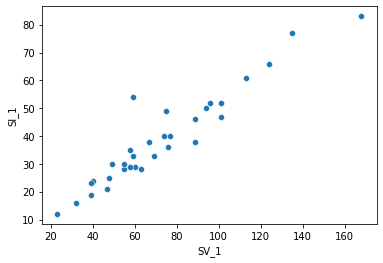

In [51]:
sns.scatterplot(data = df, x = 'SV_1', y = 'SI_1')

In [52]:
x = df['SI_1'].dropna()
y = df['CI_1'].dropna()
result = st.linregress(x,y)
result

LinregressResult(slope=0.05282184104972485, intercept=0.9831179999865634, rvalue=0.8396381039004138, pvalue=1.0132882274169944e-09, stderr=0.006137017156746934, intercept_stderr=0.26150441276806535)

Коэффициент детерминации:

In [53]:
r_squared = result.rvalue ** 2
r_squared

0.7049921455214821

# Коэффициенты корреляции

Коэффициент корреляции Пирсона

In [54]:
st.pearsonr(x,y)

(0.8396381039004139, 1.0132882274169876e-09)

Ранговый коэффициент корреляции Кенделла

In [55]:
st.kendalltau(x,y)

KendalltauResult(correlation=0.6595952922185062, pvalue=1.0819766571177962e-07)

Ранговый коэффициент корреляции Спирмена

In [56]:
st.spearmanr(x,y)

SpearmanrResult(correlation=0.8391093370570679, pvalue=1.0622063978902586e-09)